In [24]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SQLContext
sc = SparkContext()
sqlContext = SQLContext(sc)

In [25]:
house_df = sqlContext.read.csv('housing_boston.csv', header=False)
house_df.take(1)

[Row(_c0='0.00632', _c1='18.00', _c2='2.310', _c3='0', _c4='0.5380', _c5='6.5750', _c6='65.20', _c7='4.0900', _c8='1', _c9='296.0', _c10='15.30', _c11='396.90', _c12='4.98', _c13='24.00')]

CRIM — per capita crime rate by town.

ZN — proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS — proportion of non-retail business acres per town.

CHAS — Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

NOX — nitrogen oxides concentration (parts per 10 million).

RM — average number of rooms per dwelling.

AGE — proportion of owner-occupied units built prior to 1940.

DIS — weighted mean of distances to five Boston employment centres.

RAD — index of accessibility to radial highways.

TAX — full-value property-tax rate per $10,000.

PTRATIO — pupil-teacher ratio by town.

BLACK — 1000(Bk — 0.63)² where Bk is the proportion of blacks by town.

LSTAT — lower status of the population (percent).

MV — median value of owner-occupied homes in $1000s. This is the target variable.

In [26]:
columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "BLACK", "LSTAT", "MV"]

In [28]:
for i, col in enumerate(columns):
    house_df = house_df.withColumnRenamed('_c'+ str(i), col)

house_df.show(3)   

+-------+-----+-----+----+------+------+-----+------+---+-----+-------+------+-----+-----+
|   CRIM|   ZN|INDUS|CHAS|   NOX|    RM|  AGE|   DIS|RAD|  TAX|PTRATIO| BLACK|LSTAT|   MV|
+-------+-----+-----+----+------+------+-----+------+---+-----+-------+------+-----+-----+
|0.00632|18.00|2.310|   0|0.5380|6.5750|65.20|4.0900|  1|296.0|  15.30|396.90| 4.98|24.00|
|0.02731| 0.00|7.070|   0|0.4690|6.4210|78.90|4.9671|  2|242.0|  17.80|396.90| 9.14|21.60|
|0.02729| 0.00|7.070|   0|0.4690|7.1850|61.10|4.9671|  2|242.0|  17.80|392.83| 4.03|34.70|
+-------+-----+-----+----+------+------+-----+------+---+-----+-------+------+-----+-----+
only showing top 3 rows



In [34]:
from pyspark.sql.types import DoubleType
for i, col in enumerate(columns):
    house_df = house_df.withColumn(col, house_df[col].cast(DoubleType()))

In [35]:
house_df.printSchema()

root
 |-- CRIM: double (nullable = true)
 |-- ZN: double (nullable = true)
 |-- INDUS: double (nullable = true)
 |-- CHAS: double (nullable = true)
 |-- NOX: double (nullable = true)
 |-- RM: double (nullable = true)
 |-- AGE: double (nullable = true)
 |-- DIS: double (nullable = true)
 |-- RAD: double (nullable = true)
 |-- TAX: double (nullable = true)
 |-- PTRATIO: double (nullable = true)
 |-- BLACK: double (nullable = true)
 |-- LSTAT: double (nullable = true)
 |-- MV: double (nullable = true)



You can also convert to pandas dataframe and do some data exploration

In [38]:
house_df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
CRIM,505,3.6206506930693076,8.608578463327566,0.00632,88.9762
ZN,270,20.614814814814814,28.13502630807218,0.0,95.0
INDUS,506,5.93915019762844,2.759909718205204,0.01,9.9
CHAS,506,0.0691699604743083,0.2539940413404101,0.0,1.0
NOX,506,0.5546950592885372,0.11587767566755584,0.385,0.871
RM,506,6.284634387351787,0.7026171434153232,3.561,8.78
AGE,501,68.99600798403196,27.9583794958137,2.9,100.0
DIS,374,4.2732783422459875,1.9999754601541218,0.5857,9.2229
RAD,506,4.33201581027668,1.4171658677724508,1.0,8.0


Visualize a scatter matrix in pandas:

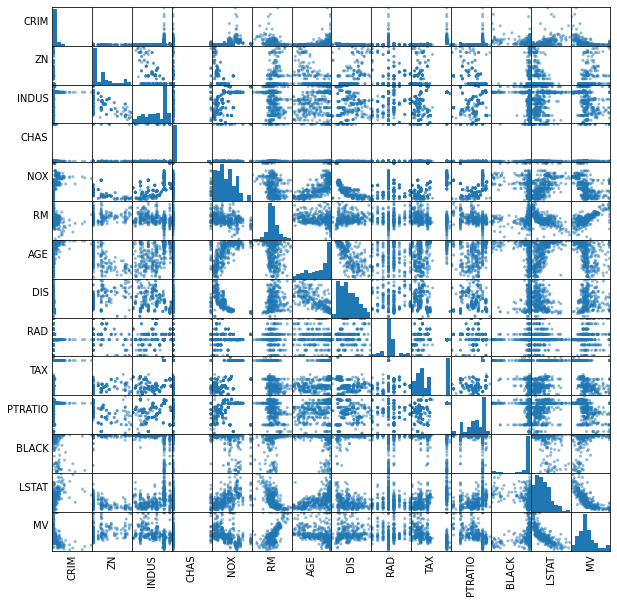

In [40]:
import pandas as pd
numeric_features = [t[0] for t in house_df.dtypes if t[1] == 'int' or t[1] == 'double']
sampled_data = house_df.select(numeric_features).sample(False, 0.8).toPandas()
axs = pd.plotting.scatter_matrix(sampled_data, figsize=(10, 10))
n = len(sampled_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

In [41]:
import six
for i in house_df.columns:
    if not( isinstance(house_df.select(i).take(1)[0][0], six.string_types)):
        print( "Correlation to MV for ", i, house_df.stat.corr('MV',i))

Correlation to MV for  CRIM -0.3883073219759914
Correlation to MV for  ZN 0.3572387416546015
Correlation to MV for  INDUS -0.34432526364944543
Correlation to MV for  CHAS 0.1752601771902987
Correlation to MV for  NOX -0.4273207723732821
Correlation to MV for  RM 0.6953599470715401
Correlation to MV for  AGE -0.37134415248979113
Correlation to MV for  DIS 0.3424369063950346
Correlation to MV for  RAD 0.11351860283524978
Correlation to MV for  TAX -0.46853593356776674
Correlation to MV for  PTRATIO -0.5077866855375622
Correlation to MV for  BLACK 0.3334608196570661
Correlation to MV for  LSTAT -0.7376627261740145
Correlation to MV for  MV 1.0


# Prepare data for ML Modules in Spark

Spark Machine Learning Library uses a "Vector" data structure

In [48]:
from pyspark.ml.feature import VectorAssembler
vectorAssembler = VectorAssembler(inputCols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'BLACK', 'LSTAT'], outputCol = 'features')
vhouse_df = vectorAssembler.transform(house_df.na.drop())
vhouse_df = vhouse_df.select(['features', 'MV'])
vhouse_df.show(3)

+--------------------+----+
|            features|  MV|
+--------------------+----+
|[0.00632,18.0,2.3...|24.0|
|[0.02731,0.0,7.07...|21.6|
|[0.02729,0.0,7.07...|34.7|
+--------------------+----+
only showing top 3 rows



Train / Test split

In [49]:
splits = vhouse_df.randomSplit([0.7, 0.3])
train_df = splits[0]
test_df = splits[1]

# Linear Regression

In [50]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol='MV', maxIter=10, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(train_df.na.drop())
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [0.0,0.00290584425043802,-0.07131461565358595,0.03600937968512201,0.0,9.061399597523456,-0.040597204112626614,-0.4880167396908069,0.026912429801207942,-0.011533683120334441,-0.45898763487369915,0.012398205331273416,-0.0720696201317935]
Intercept: -20.709544309724226


In [51]:
trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

RMSE: 2.840091
r2: 0.873690


In [52]:
lr_predictions = lr_model.transform(test_df)
lr_predictions.select("prediction","MV","features").show(5)
from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="MV",metricName="r2")
print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))

+------------------+----+--------------------+
|        prediction|  MV|            features|
+------------------+----+--------------------+
| 33.20224606134899|32.2|[0.00906,90.0,2.9...|
|  33.5967447749198|32.7|[0.01301,35.0,1.5...|
|15.913111459550155|18.9|[0.0136,75.0,4.0,...|
| 29.46385942297994|29.1|[0.01439,60.0,2.9...|
| 36.88207856167183|44.0|[0.01538,90.0,3.7...|
+------------------+----+--------------------+
only showing top 5 rows

R Squared (R2) on test data = 0.876604


In [53]:
test_result = lr_model.evaluate(test_df)
print("Root Mean Squared Error (RMSE) on test data = %g" % test_result.rootMeanSquaredError)

Root Mean Squared Error (RMSE) on test data = 3.34158


In [54]:
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show()

numIterations: 11
objectiveHistory: [0.5, 0.43492793737850005, 0.14358704467312647, 0.12553061655182757, 0.11368065477566479, 0.1095401891789939, 0.10513872254319201, 0.10485678924909231, 0.10383956665718284, 0.10373048692436583, 0.10356270084772448]
+--------------------+
|           residuals|
+--------------------+
|  -4.266172705202646|
|  -4.746878623321603|
|  1.5078639607478337|
|   7.976147649171452|
|  -3.214904564567025|
|  6.4066102856342155|
| -2.2325219153444102|
|   6.206503340555315|
| -0.6610416904835752|
|  -3.061101360503887|
|   1.894363382718545|
| -1.4333249423183965|
|   3.193632891711985|
| -1.0908232678087266|
|  1.7604283598344352|
|  -1.507170461798811|
|   4.357566826332363|
|  1.6949208016501345|
| -0.6632044797808767|
|-0.14251483211240767|
+--------------------+
only showing top 20 rows



In [55]:
predictions = lr_model.transform(test_df)
predictions.select("prediction","MV","features").show()

+------------------+----+--------------------+
|        prediction|  MV|            features|
+------------------+----+--------------------+
| 33.20224606134899|32.2|[0.00906,90.0,2.9...|
|  33.5967447749198|32.7|[0.01301,35.0,1.5...|
|15.913111459550155|18.9|[0.0136,75.0,4.0,...|
| 29.46385942297994|29.1|[0.01439,60.0,2.9...|
| 36.88207856167183|44.0|[0.01538,90.0,3.7...|
|31.900803466069515|32.9|[0.01778,95.0,1.4...|
| 25.24617795570241|23.1|[0.0187,85.0,4.15...|
|30.046214851837096|33.0|[0.01951,17.5,1.3...|
| 24.39887243001225|24.7|[0.02055,85.0,0.7...|
| 38.61627985223569|42.3|[0.02177,82.5,2.0...|
|25.008415938373393|16.5|[0.02498,0.0,1.89...|
| 32.66054042169391|34.7|[0.02729,0.0,7.07...|
|24.697185832806046|21.6|[0.02731,0.0,7.07...|
| 31.34686713515234|33.4|[0.03237,0.0,2.18...|
|22.538222626498698|20.6|[0.03306,0.0,5.19...|
|22.113333509231264|19.4|[0.03466,35.0,6.0...|
| 22.81455442748909|22.9|[0.03551,25.0,4.8...|
| 33.51772926913158|35.4|[0.03705,20.0,3.3...|
|27.137304537

# Decision Tree Regression

In [56]:
from pyspark.ml.regression import DecisionTreeRegressor
dt = DecisionTreeRegressor(featuresCol ='features', labelCol = 'MV')
dt_model = dt.fit(train_df)
dt_predictions = dt_model.transform(test_df)
dt_evaluator = RegressionEvaluator(
    labelCol="MV", predictionCol="prediction", metricName="rmse")
rmse = dt_evaluator.evaluate(dt_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Root Mean Squared Error (RMSE) on test data = 3.8851


Feature importances

In [57]:
dt_model.featureImportances

SparseVector(13, {0: 0.0265, 1: 0.0091, 2: 0.0027, 5: 0.8639, 6: 0.0197, 7: 0.0129, 9: 0.0138, 10: 0.0069, 11: 0.0038, 12: 0.0406})

# Gradient Boosted Tree Regression

In [58]:
from pyspark.ml.regression import GBTRegressor
gbt = GBTRegressor(featuresCol = 'features', labelCol = 'MV', maxIter=10)
gbt_model = gbt.fit(train_df)
gbt_predictions = gbt_model.transform(test_df)
gbt_predictions.select('prediction', 'MV', 'features').show(5)

+------------------+----+--------------------+
|        prediction|  MV|            features|
+------------------+----+--------------------+
| 31.70799399666165|32.2|[0.00906,90.0,2.9...|
|32.641330844074716|32.7|[0.01301,35.0,1.5...|
|18.428362826873332|18.9|[0.0136,75.0,4.0,...|
|  23.6703662081384|29.1|[0.01439,60.0,2.9...|
| 35.76846207015405|44.0|[0.01538,90.0,3.7...|
+------------------+----+--------------------+
only showing top 5 rows



In [59]:
gbt_evaluator = RegressionEvaluator(
    labelCol="MV", predictionCol="prediction", metricName="rmse")
rmse = gbt_evaluator.evaluate(gbt_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Root Mean Squared Error (RMSE) on test data = 3.64473
